In [1]:
import Peptide_Chef as Chef
import math
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
# from Peptide_Chef import Cook_Book

In [2]:
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The numpy version is 1.19.1.
The pandas version is 1.0.5.
The matplotlib version is 3.2.2.
The seaborn version is 0.11.0.


# In silico Digestion 

In [3]:
# use labelling format (below) to keep track of dfs.
##(*_dig= Digestion of Given Enzyme/Missed/Length/Charge)

In [4]:
url="https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000005640/UP000005640_9606.fasta.gz"

In [5]:
Menu=Chef.CookBook(homebrew=False, takeout=True,url=url,measure=True, target="Peptide")

Unzipping...
Takeout is Done!
Here ya go boss!


In [6]:
Menu.head()

,Peptide,UniprotID,Gene,Identification,Protein_Length
0,MGCCGCGSCGGCGGGCGGCGGGCGGGCGGGCGSCTTCRCYRVGCCS...,A0A286YF01,SCGR7,HUMAN Small cysteine and glycine repeat-contai...,96
1,MRAKPQSPLPRNPVPAWSPPTTTTDPMLEKDAAGGDFPANLVLQLM...,A1L1A6,IGS23,HUMAN Immunoglobulin superfamily member 23 OS=...,192
2,MVLLAGTRPQGGEARCMIPPPPSPLLGAQVEEDRTEFKEFQDFSSL...,A6NHS1,YK042,HUMAN Putative uncharacterized protein ENSP000...,94
3,MRLCLIPWNTTPHRVLPPVVWSAPSRKKPVLSARNSMMFGHLSPVR...,A6NL46,YF016,HUMAN Putative UPF0607 protein ENSP00000332738...,340
4,MRLCLIPQNTGTPQRVLPPVVWSPPSRKKPMLSACNSMMFGHLSPV...,A8MUI8,YA034,HUMAN Putative UPF0607 protein ENSP00000383783...,341


In [7]:
Chef.rules

{'arg-c': 'R',
 'asp-n': '\\w(?=D)',
 'bnps-skatole': 'W',
 'caspase 1': '(?<=[FWYL]\\w[HAT])D(?=[^PEDQKR])',
 'caspase 2': '(?<=DVA)D(?=[^PEDQKR])',
 'caspase 3': '(?<=DMQ)D(?=[^PEDQKR])',
 'caspase 4': '(?<=LEV)D(?=[^PEDQKR])',
 'caspase 5': '(?<=[LW]EH)D',
 'caspase 6': '(?<=VE[HI])D(?=[^PEDQKR])',
 'caspase 7': '(?<=DEV)D(?=[^PEDQKR])',
 'caspase 8': '(?<=[IL]ET)D(?=[^PEDQKR])',
 'caspase 9': '(?<=LEH)D',
 'caspase 10': '(?<=IEA)D',
 'chymotrypsin high specificity': '([FY](?=[^P]))|(W(?=[^MP]))',
 'chymotrypsin low specificity': '([FLY](?=[^P]))|(W(?=[^MP]))|(M(?=[^PY]))|(H(?=[^DMPW]))',
 'clostripain': 'R',
 'cnbr': 'M',
 'enterokinase': '(?<=[DE]{3})K',
 'factor xa': '(?<=[AFGILTVM][DE]G)R',
 'formic acid': 'D',
 'glutamyl endopeptidase': 'E',
 'granzyme b': '(?<=IEP)D',
 'hydroxylamine': 'N(?=G)',
 'iodosobenzoic acid': 'W',
 'lysc': 'K',
 'ntcb': '\\w(?=C)',
 'pepsin ph1.3': '((?<=[^HKR][^P])[^R](?=[FL][^P]))|((?<=[^HKR][^P])[FL](?=\\w[^P]))',
 'pepsin ph2.0': '((?<=[^HKR][^P])

## Trypsin in Silco Digestion

In [8]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="trypsin"
Tryp_Peptides=[]
for site in missed_sites:
    x=f"Tryp_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="Gene", rule=enzyme,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)
    Tryp_Peptides.append(globals()[str(x)])
    

You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 0-missed cleavages. 
Preparing your order...
Order is up! You have acquired 418473 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 1-missed cleavages. 
Preparing your order...
Order is up! You have acquired 1153504 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 2-missed cleavages. 
Preparing your order...
Order is up! You have acquired 1995697 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut pept

In [9]:
Tryp_0_dig.head()

,SCGR7,gene,aa_comp,peptide,Length,z,Mass,m/z,counts
0,TCGSCGCGCGK,SCGR7,"{'T': 1, 'C': 4, 'G': 4, 'S': 1, 'K': 1}",TCGSCGCGCGK,11,2,956,478.000000,4
1,TCGSCGCGCGK,SCGR7,"{'T': 1, 'C': 4, 'G': 4, 'S': 1, 'K': 1}",TCGSCGCGCGK,11,2,956,478.000000,4
2,TCGSCGCGCGK,SCGR7,"{'T': 1, 'C': 4, 'G': 4, 'S': 1, 'K': 1}",TCGSCGCGCGK,11,2,956,478.000000,4
3,TCGSCGCGCGK,SCGR7,"{'T': 1, 'C': 4, 'G': 4, 'S': 1, 'K': 1}",TCGSCGCGCGK,11,2,956,478.000000,4
4,NaN,IGS23,"{'Q': 3, 'L': 9, 'V': 2, 'S': 6, 'E': 4, 'P': ...",QLVSEPVTISLPKPIMQPTEAEPMEPDPTLSLSGGSAIGLLAAGIL...,64,3,6463,2154.333333,7


In [10]:
len(Tryp_Peptides)

4

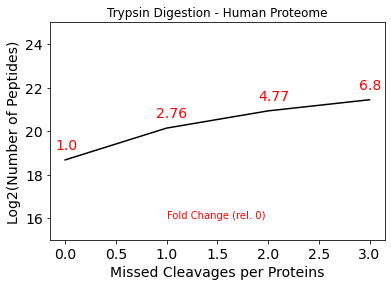

In [11]:
T_Pep_Counts=[]
#Count are in Log10
for df in Tryp_Peptides:
    log = math.log2(len(df))
    T_Pep_Counts.append(log)
plt.plot(missed_sites,T_Pep_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([15, 25])
Ratios=[]
for count in T_Pep_Counts:
    ratio=2**(count-T_Pep_Counts[0])
    ratiox=float(round(ratio,2))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,T_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1,16,"Fold Change (rel. 0)",color="red")
plt.show()

The number of proteins with > 1 peptides : 15365.0
Ratio of Proteins with > 1 Peptides Identified: 99.360
The number of proteins with > 1 peptides : 15465.0
Ratio of Proteins with > 1 Peptides Identified: 99.935
The number of proteins with > 1 peptides : 15466.0
Ratio of Proteins with > 1 Peptides Identified: 99.942
The number of proteins with > 1 peptides : 15467.0
Ratio of Proteins with > 1 Peptides Identified: 99.942


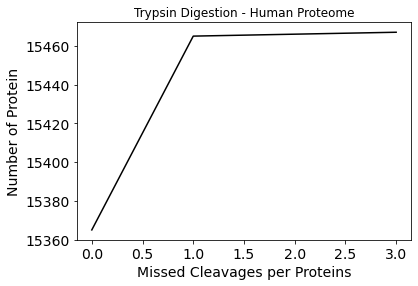

In [12]:
T_Pro_Counts=[]
#Count are in Log10
for df in Tryp_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",1)
    T_Pro_Counts.append(y)
plt.plot(missed_sites,T_Pro_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Protein', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [13]:
import re
def Pep2Pro(protein,peptides):
    protein = re.sub(r'[^A-Z]', '', protein)
    mask = np.zeros(len(protein), dtype=np.int8)
    for peptide in peptides:
        indices = [m.start() for m in re.finditer(
            '(?={})'.format(re.sub(r'[^A-Z]', '', peptide)), protein)]
        for i in indices:
            mask[i:i + len(peptide)] = 1
    return mask.sum(dtype=float) / mask.size

In [14]:
raw=Menu[["Peptide", "Gene"]].set_index("Gene").to_dict()["Peptide"]
Tryp_Silico_Coverage=pd.DataFrame()
i=0
columns=["Tryp_0","Tryp_1","Tryp_2","Tryp_3",]
for df in Tryp_Peptides:
    name=f"SC_{columns[i]}" 
    x_list=list()
    for gene, protein in raw.items():
        temp=df.loc[df.gene == gene]["peptide"]
        temp2=list(temp)
        x=Pep2Pro(protein,temp2)
        x_list.append(x)
    cov_df[name]= np.array(x_list)
    i+=1
    print("On to the next...")
print("Done")

On to the next...
On to the next...
On to the next...
On to the next...
Done


In [54]:
Tryp_Silico_Coverage.replace(np.nan, 0, inplace=True)

In [55]:
Tryp_Silico_Coverage.describe()

,SC_Tryp_0,SC_Tryp_1,SC_Tryp_2,SC_Tryp_3
count,20614.000000,20614.000000,20614.000000,20614.000000
mean,0.046237,0.045412,0.045169,0.045072
std,0.077167,0.081587,0.081720,0.081879
min,0.000000,0.000000,0.000000,0.000000
25%,0.001305,0.001778,0.001836,0.001836
50%,0.023592,0.022951,0.022876,0.022782
75%,0.056726,0.052258,0.052045,0.051845
max,1.000000,1.000000,1.000000,1.000000


(array([1.3075e+04, 1.6800e+03, 3.9200e+02, 1.5300e+02, 5.8000e+01,
        2.8000e+01, 2.2000e+01, 3.4000e+01, 6.0000e+00, 1.6000e+01]),
 array([7.56914119e-04, 1.00681223e-01, 2.00605531e-01, 3.00529840e-01,
        4.00454148e-01, 5.00378457e-01, 6.00302766e-01, 7.00227074e-01,
        8.00151383e-01, 9.00075691e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

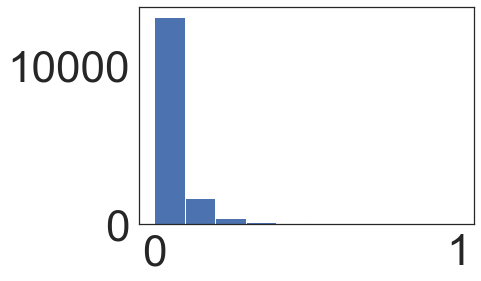

In [39]:
plt.hist(Tryp_Silico_Coverage['SC_Tryp_0'])

In [17]:
Tryp_Silico_Coverage.to_excel('Silico_Trypsin_Coverage.xlsx')

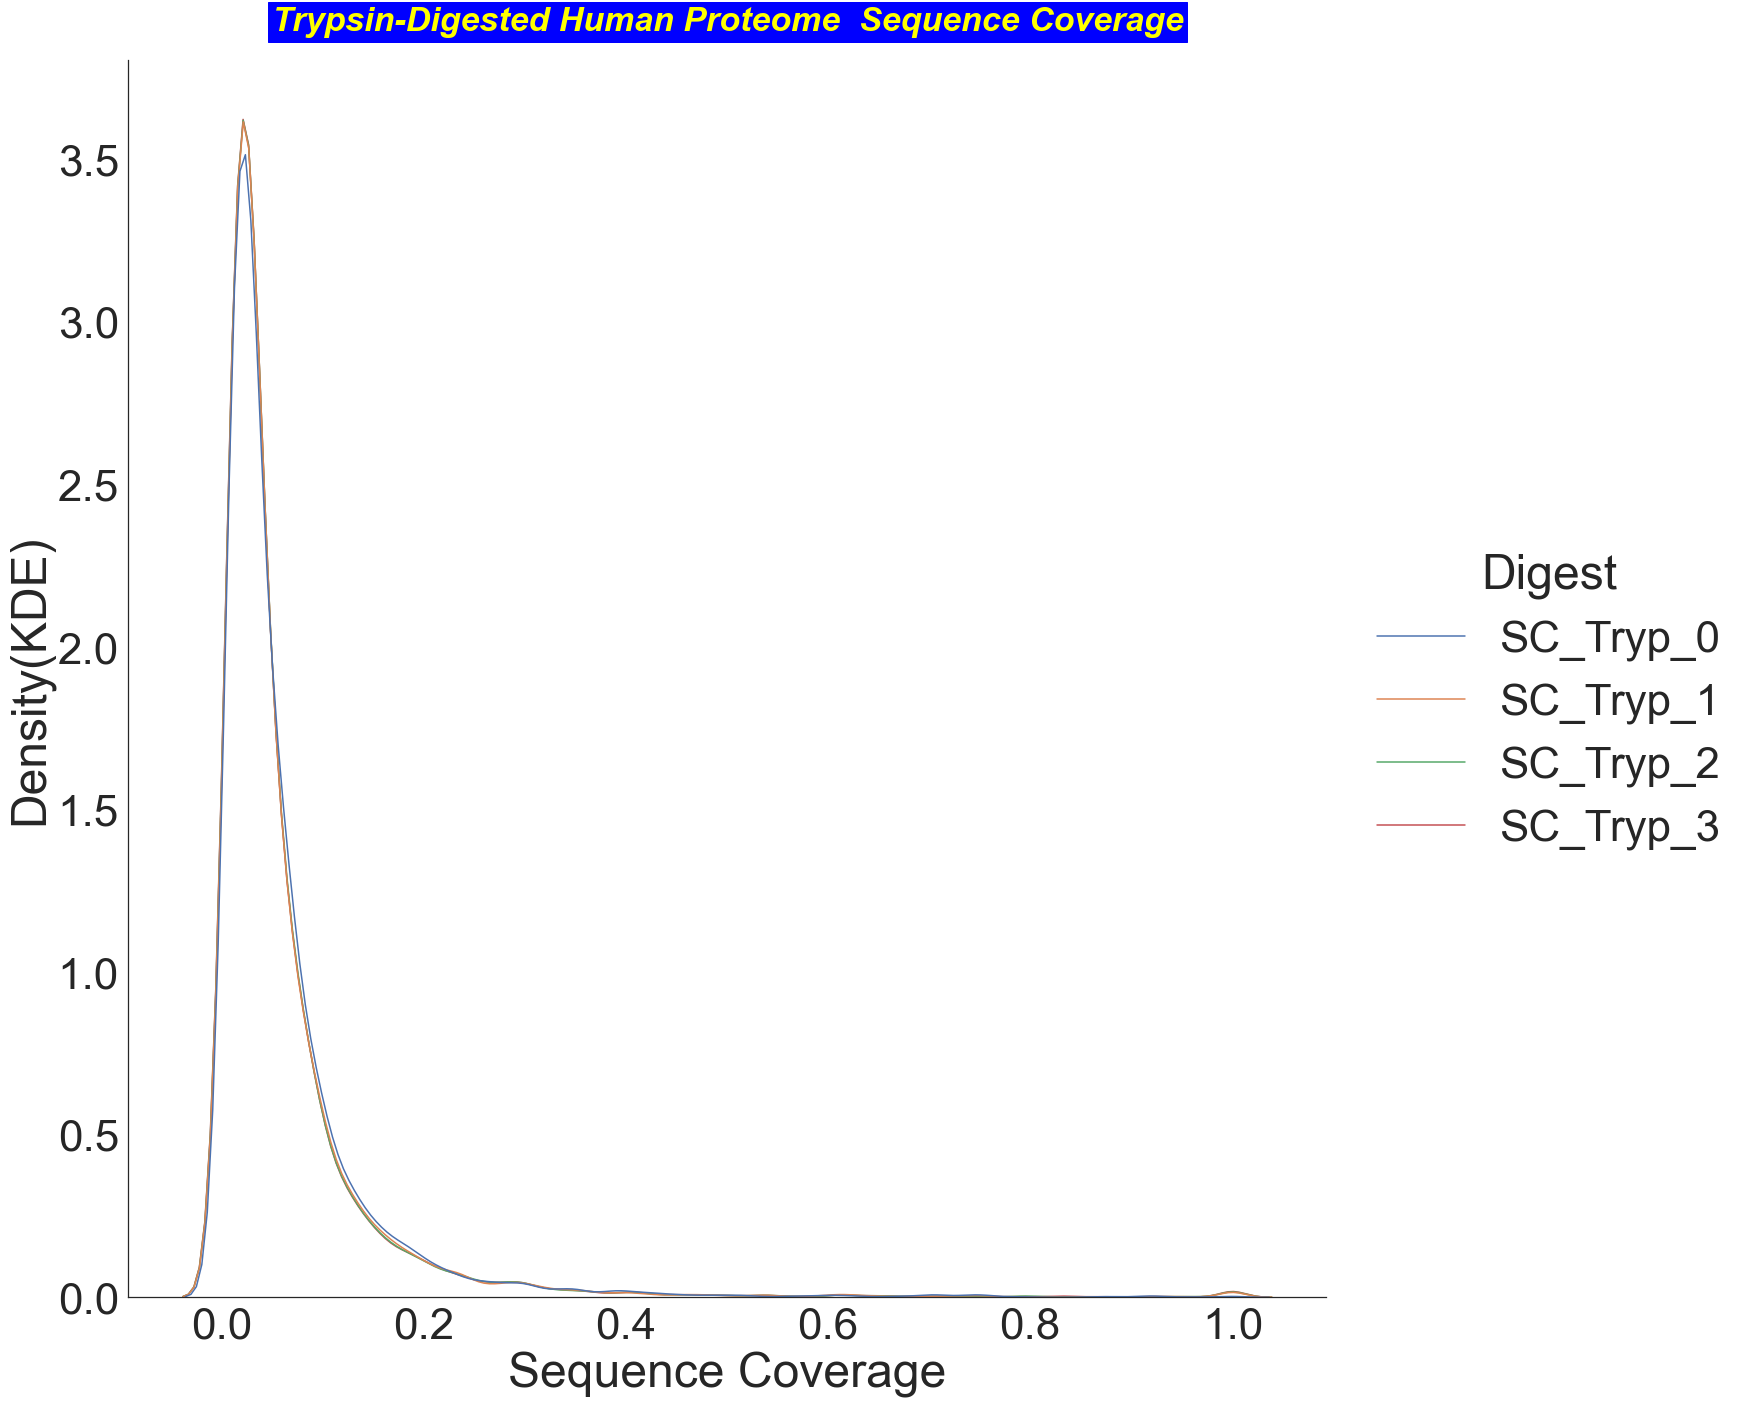

In [18]:
df1 = Tryp_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('Trypsin-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique');

## AspN in Silco Digestion

In [20]:
# AspN in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="asp-n"
AspN_Peptides=[]
for site in missed_sites:
    x=f"AspN_{site}_dig"
    zz=Chef.ButcherShop(Menu,target="Peptide",identifier="Gene", rule=enzyme,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(zz,meat_package=True)
    AspN_Peptides.append(globals()[str(x)])
    
    

You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Generating asp-n-cut peptides based on 0-missed cleavages. 
Preparing your order...
Order is up! You have acquired 349508 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Generating asp-n-cut peptides based on 1-missed cleavages. 
Preparing your order...
Order is up! You have acquired 770186 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Generating asp-n-cut peptides based on 2-missed cleavages. 
Preparing your order...
Order is up! You have acquired 1155730 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Generating asp-n-cut peptides based on 3-m

In [21]:
AspN_Peptides[0]

,gene,aa_comp,peptide,Length,z,Mass,m/z,counts
0,SCGR7,"{'M': 1, 'G': 30, 'C': 37, 'S': 6, 'T': 4, 'R'...",MGCCGCGSCGGCGGGCGGCGGGCGGGCGGGCGSCTTCRCYRVGCCS...,96,9,8928,992.0,1
1,IGS23,"{'D': 1, 'R': 2, 'Q': 1, 'I': 2, 'G': 1, 'C': ...",DRQRIGICS,9,3,1029,343.0,5
2,IGS23,"{'D': 1, 'R': 2, 'Q': 1, 'I': 2, 'G': 1, 'C': ...",DRQRIGICS,9,3,1029,343.0,5
3,IGS23,"{'D': 1, 'R': 2, 'Q': 1, 'I': 2, 'G': 1, 'C': ...",DRQRIGICS,9,3,1029,343.0,5
4,IGS23,"{'D': 1, 'R': 2, 'Q': 1, 'I': 2, 'G': 1, 'C': ...",DRQRIGICS,9,3,1029,343.0,5
...,...,...,...,...,...,...,...,...
349503,TTC7A,"{'D': 1, 'C': 1, 'F': 2, 'L': 5, 'T': 1, 'A': ...",DCFLTALELEASSPVLPFSIIPREL,25,2,2738,1369.0,21
349504,TTC7A,"{'D': 1, 'C': 1, 'F': 2, 'L': 5, 'T': 1, 'A': ...",DCFLTALELEASSPVLPFSIIPREL,25,2,2738,1369.0,21
349505,TTC7A,"{'D': 1, 'C': 1, 'F': 2, 'L': 5, 'T': 1, 'A': ...",DCFLTALELEASSPVLPFSIIPREL,25,2,2738,1369.0,21
349506,TTC7A,"{'D': 1, 'C': 1, 'F': 2, 'L': 5, 'T': 1, 'A': ...",DCFLTALELEASSPVLPFSIIPREL,25,2,2738,1369.0,21


In [22]:
len(AspN_Peptides)

4

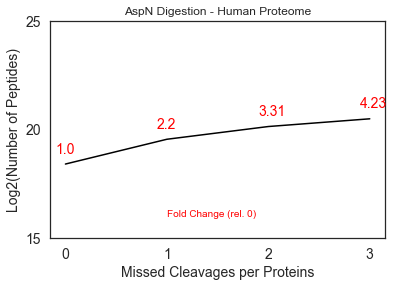

In [51]:
A_Pep_Counts=[]
#Count are in Log10
for df in AspN_Peptides:
    log = math.log2(len(df))
    A_Pep_Counts.append(log)
plt.plot(missed_sites,A_Pep_Counts,color="black")
plt.title('AspN Digestion - Human Proteome', fontsize=12)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([15, 25])
Ratios=[]
for count in A_Pep_Counts:
    ratio=2**(count-A_Pep_Counts[0])
    ratiox=float(round(ratio,2))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,A_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1,16,"Fold Change (rel. 0)",color="red", fontsize=10)
plt.show()

The number of proteins with > 1 peptides : 17988.0
Ratio of Proteins with > 1 Peptides Identified: 98.284
The number of proteins with > 1 peptides : 17904.0
Ratio of Proteins with > 1 Peptides Identified: 98.743
The number of proteins with > 1 peptides : 17834.0
Ratio of Proteins with > 1 Peptides Identified: 98.738
The number of proteins with > 1 peptides : 17818.0
Ratio of Proteins with > 1 Peptides Identified: 98.737


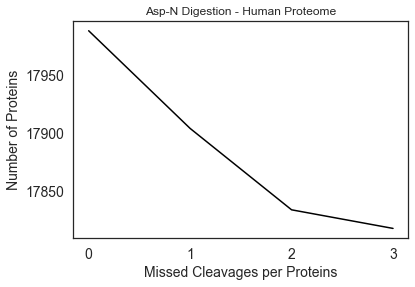

In [27]:
A_Pro_Counts=[]
#Count are in Log10
for df in AspN_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",1)
    A_Pro_Counts.append(y)
plt.plot(missed_sites,A_Pro_Counts,color="black")
plt.title('Asp-N Digestion - Human Proteome', fontsize=12)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Proteins', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [46]:
raw=Menu[["Peptide", "Gene"]].set_index("Gene").to_dict()["Peptide"]
AspN_Silico_Coverage=pd.DataFrame()
i=0
columns=["AspN_0","AspN_1","AspN_2","AspN_3",]
for df in AspN_Peptides:
    name=f"SC_{columns[i]}" 
    x_list=list()
    max_len=len(df)
    for gene, protein in raw.items():
        temp=df.loc[df.gene == gene]["peptide"]
        temp2=list(temp)
        x=Pep2Pro(protein,temp2)
        x_list.append(x)
    AspN_Silico_Coverage[name]= np.array(x_list)
    i+=1
    print("On to the next...")
print("Done")

On to the next...
On to the next...
On to the next...
On to the next...
Done


In [63]:
AspN_Silico_Coverage.replace(0,np.nan, inplace=True)

In [64]:
AspN_Silico_Coverage.describe()

,SC_AspN_0,SC_AspN_1,SC_AspN_2,SC_AspN_3
count,18302.000000,18132.000000,18062.000000,18046.000000
mean,0.104624,0.105596,0.105683,0.105684
std,0.143421,0.144886,0.145082,0.145075
min,0.000349,0.000349,0.000349,0.000349
25%,0.029041,0.029246,0.029255,0.029255
50%,0.058590,0.059158,0.059200,0.059190
75%,0.120612,0.121572,0.121578,0.121646
max,1.000000,1.000000,1.000000,1.000000


(array([12666.,  3360.,  1115.,   467.,   221.,   122.,    68.,    57.,
           26.,   200.]),
 array([3.49344978e-04, 1.00314410e-01, 2.00279476e-01, 3.00244541e-01,
        4.00209607e-01, 5.00174672e-01, 6.00139738e-01, 7.00104803e-01,
        8.00069869e-01, 9.00034934e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

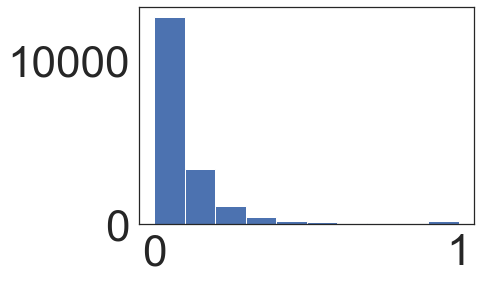

In [65]:
plt.hist(AspN_Silico_Coverage['SC_AspN_0'])

In [49]:
AspN_Silico_Coverage.to_excel('Silico_AspN_Coverage.xlsx')

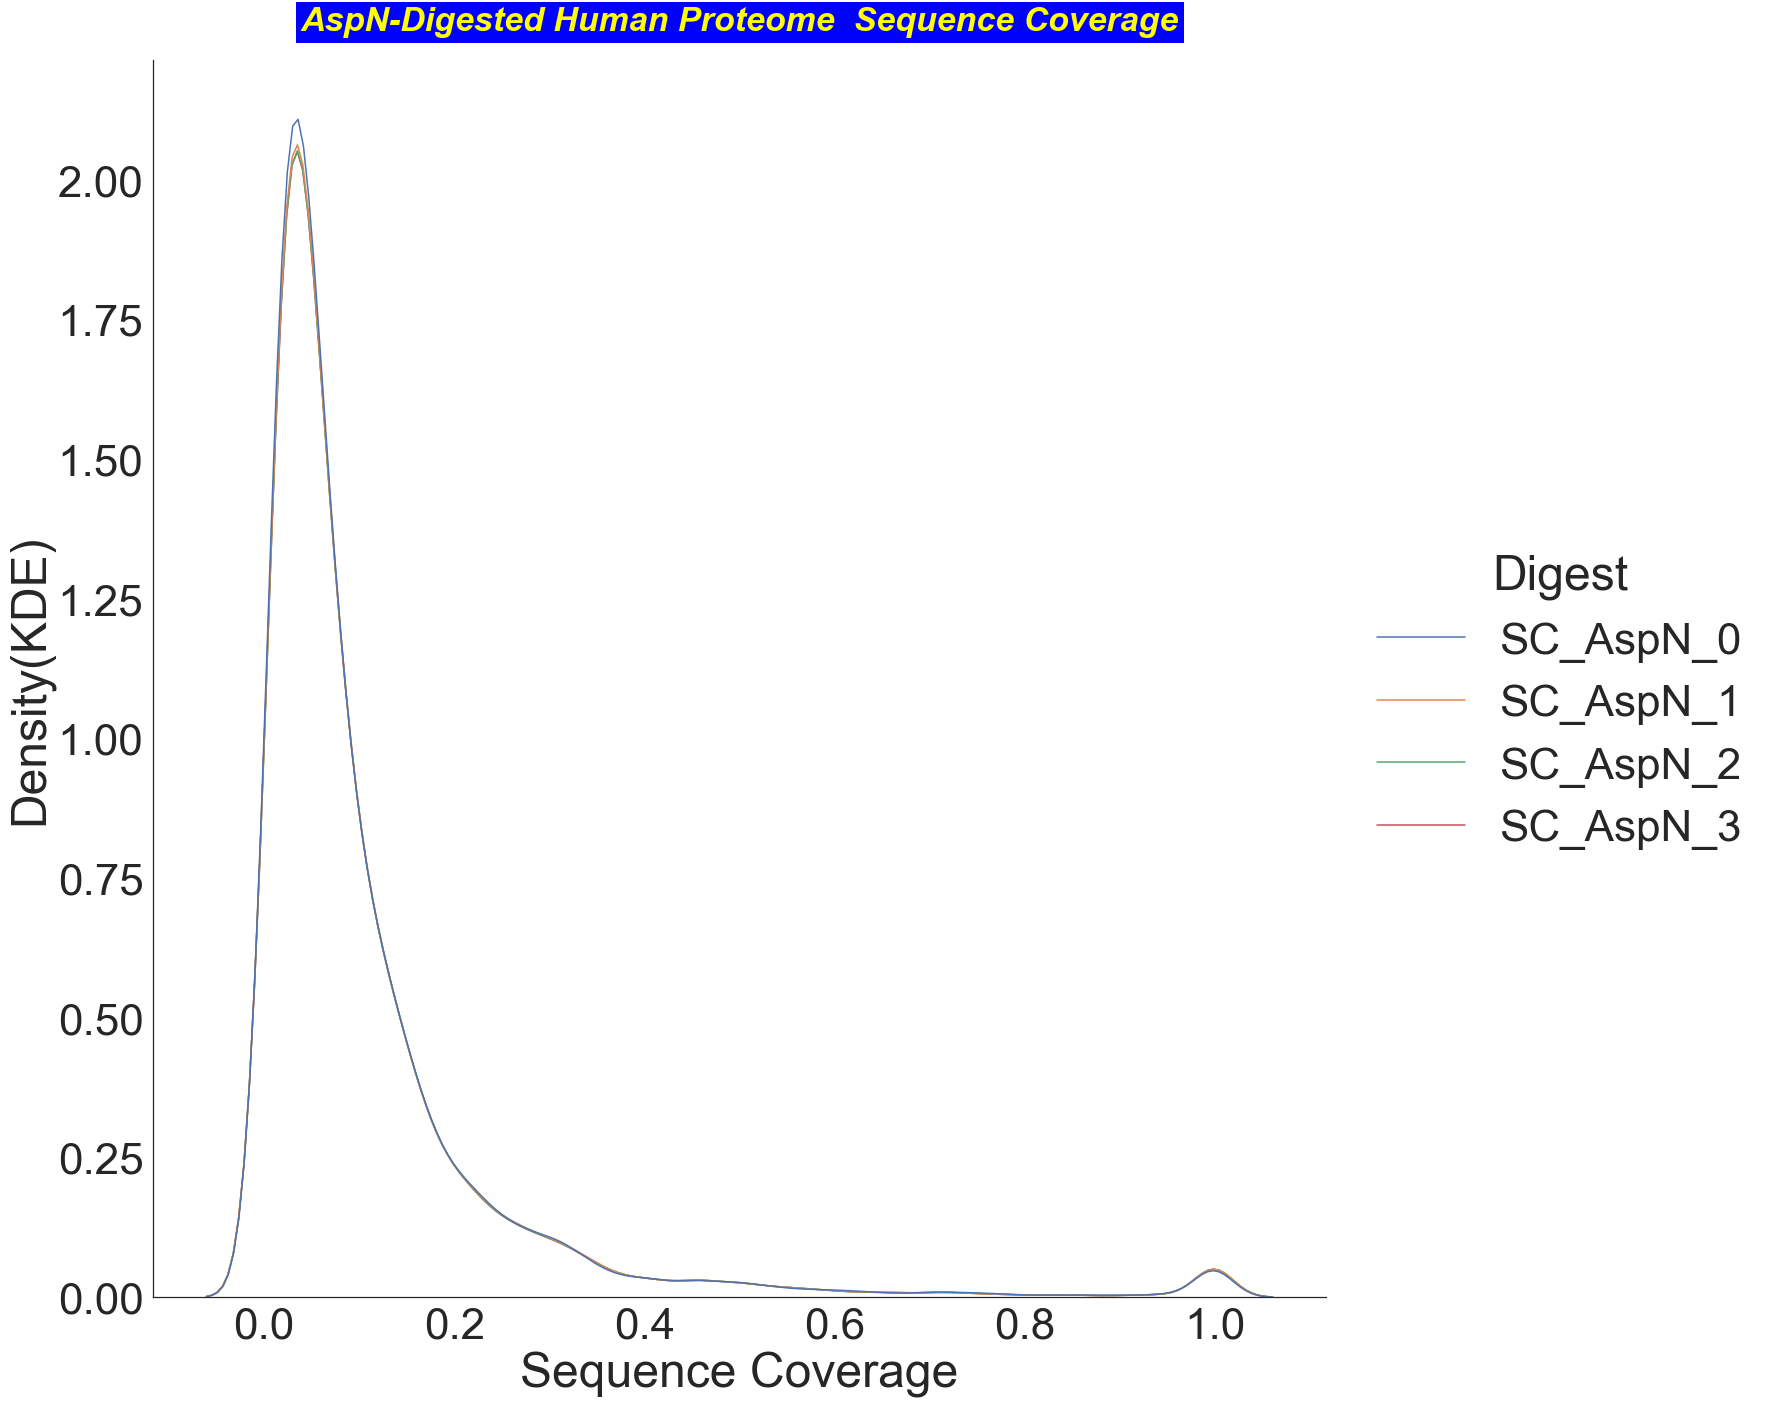

In [50]:
df1 = AspN_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('AspN-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique');

## GluC in Silco Digestion

In [ ]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="glutamyl endopeptidase"
for site in missed_sites:
    x=f"GluC_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="Gene", rule=enzyme,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)

In [ ]:
GluC_0_dig.head()

# Raw Experimental Data